## <font color=orange>DSCI-633-2225, **Final Project** </font>
# **Analyzing the Adoption and Usage of Electric Vehicles in Washington State**
### <font color=blue>Team Number: 4 </font>
### <font color=blue>Team Members: Abhishek Shah, Krishna Margali Goparapu, Noopur Phadkar </font>

***

## <font color=orange> Exploratory Data Analysis [EDA] </font>

### Data description

**VIN (1-10)**: The unique identifier of the vehicle


**County**: The county where the vehicle is registered


**City**: The city where the vehicle is registered


**State**: The state where the vehicle is registered


**Postal Code**: The postal code of the registration location


**Model Year**: The year of the vehicle's model


**Make**: The manufacturer of the vehicle


**Model**: The model of the vehicle


**Electric Vehicle Type**: Type of electric vehicle (e.g. battery electric, plug-in hybrid)


**Clean Alternative Fuel Vehicle (CAFV) Eligibility** : Whether the vehicle is eligible for Clean Alternative Fuel Vehicle (CAFV) incentives or not


**Electric Range**: The estimated electric range of the vehicle in miles


**Base MSRP**: The manufacturer's suggested retail price of the vehicle


**Legislative District**: The legislative district where the vehicle is registered


**DOL Vehicle ID**: The vehicle identification number assigned by the Department of Licensing


**Vehicle Location**: The location of the vehicle in longitude and latitude


**Electric Utility**: The utility company that supplies electricity to the vehicle owner


**2020 Census Tract**: The census tract where the vehicle is registered

***

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read the data
df = pd.read_csv("Electric_Vehicle_Population_Data.csv")

In [3]:
# First two elements in the dataset
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB2J,Suffolk,Suffolk,VA,23435.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,NaN,476647986,POINT (-76.42443 36.8752),NaN,5.180008e+10
1,5YJ3E1ECXL,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,103490145,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
2,WA1LAAGE7M,Yakima,Yakima,WA,98908.0,2021,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,222,0,14.0,144941534,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
3,5YJ3E1EA1K,Danville,Danville,VA,24541.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,168513922,POINT (-79.4172 36.58598),NaN,5.159000e+10
4,1FADP5CU9E,Norfolk,Norfolk,VA,23518.0,2014,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,NaN,150749378,POINT (-76.21549 36.92478),NaN,5.171001e+10


In [4]:
# Shape of the data
rows, columns = df.shape
print("Total rows in the dataset: ", rows)
print("Total columns in the dataset: ", columns)

Total rows in the dataset:  121978
Total columns in the dataset:  17


In [5]:
# Column names
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [6]:
# Descriptive statistics of the numerical data
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,121976.000000,121978.00000,121978.000000,121978.000000,121681.000000,1.219780e+05,1.219760e+05
mean,98159.128451,2019.30890,81.301407,1627.059798,29.738760,2.029409e+08,5.297007e+10
std,2602.756790,2.95635,100.890849,10267.478923,14.737141,8.979138e+07,1.659161e+09
min,1730.000000,1997.00000,0.000000,0.000000,1.000000,4.385000e+03,1.081042e+09
25%,98052.000000,2018.00000,0.000000,0.000000,18.000000,1.523397e+08,5.303301e+10
50%,98121.000000,2020.00000,25.000000,0.000000,34.000000,1.967532e+08,5.303303e+10
75%,98370.000000,2022.00000,200.000000,0.000000,43.000000,2.258338e+08,5.305307e+10
max,99701.000000,2023.00000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [7]:
# data types of columns in the dataframe
df.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

In [8]:
# As 2023 is still yet to finish, remove it
df = df[df['Model Year'] != 2023]

In [9]:
df['Make'].value_counts().head(10)

TESLA         51120
NISSAN        12597
CHEVROLET      9989
FORD           6248
BMW            4616
TOYOTA         4516
KIA            4381
VOLKSWAGEN     2676
AUDI           2354
VOLVO          2236
Name: Make, dtype: int64

In [10]:
df['Electric Vehicle Type'].value_counts()

Battery Electric Vehicle (BEV)            85016
Plug-in Hybrid Electric Vehicle (PHEV)    26965
Name: Electric Vehicle Type, dtype: int64

In [11]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

Clean Alternative Fuel Vehicle Eligible                         58711
Eligibility unknown as battery range has not been researched    38315
Not eligible due to low battery range                           14955
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, dtype: int64

In [12]:
df['City'].value_counts()

Seattle           19994
Bellevue           5754
Redmond            4076
Vancouver          4056
Kirkland           3538
                  ...  
Tempe                 1
Colton                1
Annapolis             1
Hatton                1
Smiths Station        1
Name: City, Length: 641, dtype: int64

In [13]:
df['State'].value_counts().head(10)

WA    111691
CA        75
VA        37
MD        27
TX        18
CO         9
NC         9
CT         7
IL         7
NV         7
Name: State, dtype: int64

In [14]:
# MSRP - Manufacturer's suggested retail price
df[['Electric Range','Base MSRP']].describe()

,Electric Range,Base MSRP
count,111981.000000,111981.000000
mean,88.351185,1772.314053
std,102.352907,10703.977864
min,0.000000,0.000000
25%,0.000000,0.000000
50%,33.000000,0.000000
75%,208.000000,0.000000
max,337.000000,845000.000000


- It appears that there are missing values in both the "Electric Range" and "Base MSRP" columns, as evidenced by the difference in the number of non-null values compared to the total number of rows in the dataset


- Additionally, the mean values for both columns suggest that there are many vehicles with a range of 0 and a base MSRP of 0, which could indicate missing or incomplete data

#### Correlation Matrix

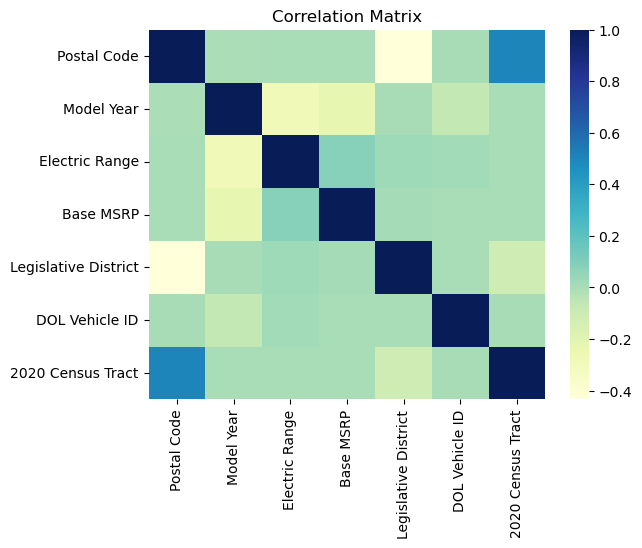

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# create correlation matrix
corr_matrix = df.corr()

# plot heatmap
sns.heatmap(corr_matrix, cmap="YlGnBu")
plt.title("Correlation Matrix")
plt.show()

- The heatmap can help us identify any patterns or relationships between the features, which can inform our data analysis and modeling approach.

#### #### Number of electric vehicles per year model

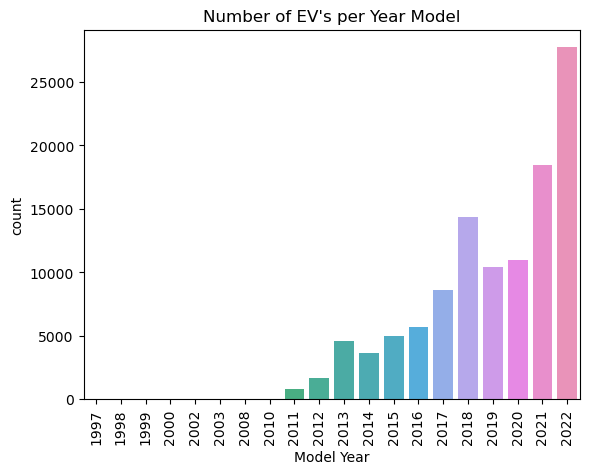

In [16]:
# Count the number of EVs per year model
ev_count = df['Model Year'].value_counts()

# Create a bar plot
plt.bar(ev_count.index, ev_count.values)

# Set the title and axis labels
plt.title("Number of EV's per Year Model")
plt.xlabel("Year Model")
plt.ylabel("Count of EV's")
sns.countplot(data=df, x='Model Year')
plt.xticks(rotation=90)
plt.show()


# Display the plot
plt.show()

- The graph shows that the majority of the electric vehicles in the dataset were manufactured between 2016 and 2021, with the highest frequency in the year 2022.

#### Distribution of Electric Range by CAFV Eligibility

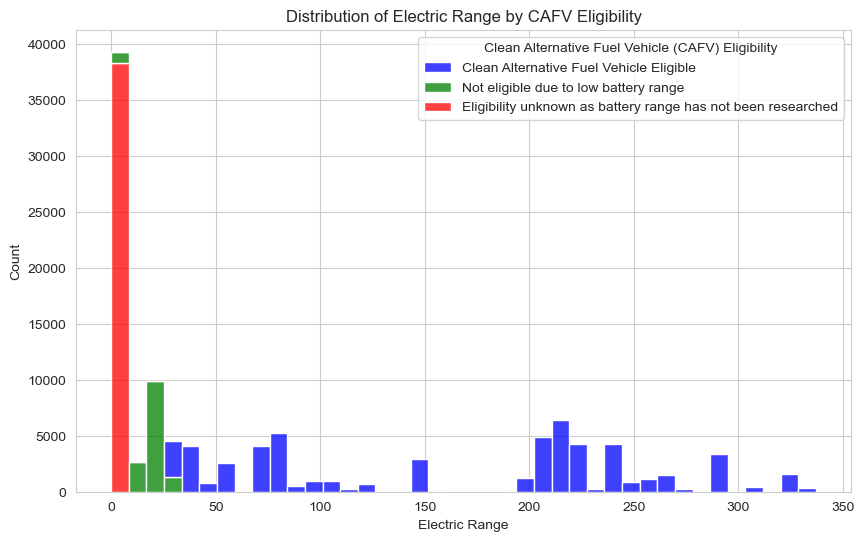

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Electric Range", hue="Clean Alternative Fuel Vehicle (CAFV) Eligibility", 
             multiple="stack", legend='brief', palette=['blue', 'green', 'red'])
plt.title('Distribution of Electric Range by CAFV Eligibility')
plt.xlabel('Electric Range')
plt.ylabel('Count')
plt.show()

- The histogram shows the distribution of electric range of electric vehicles, separated by their eligibility for Clean Alternative Fuel Vehicle (CAFV) program. It appears that a majority of electric vehicles have a range between 0 to 250 miles


- The vehicles that are eligible for the CAFV program seem to have a slightly higher range, with a peak around 200 to 250 miles. The non-CAFV eligible vehicles, on the other hand, are concentrated around the 0 to 100 miles range

#### Distribution of electric range for different EV types. 

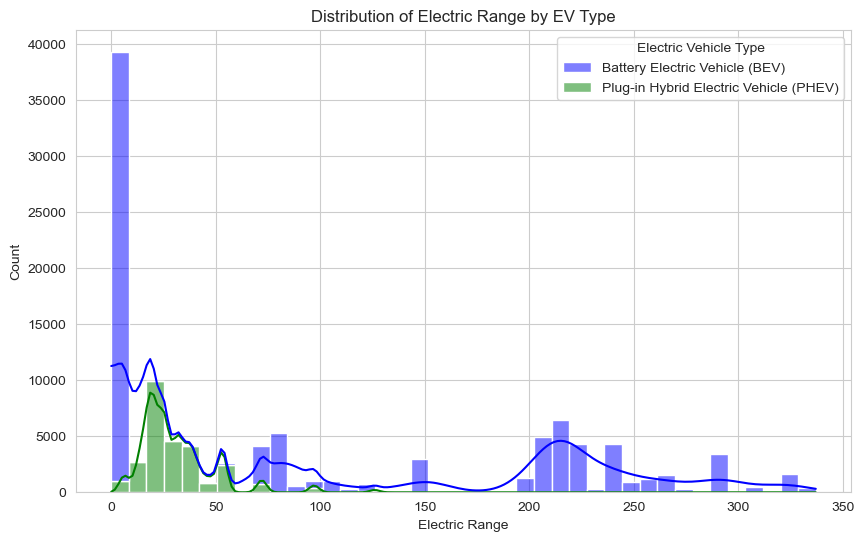

In [18]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
colors = {'Battery Electric Vehicle (BEV)': 'blue', 'Plug-in Hybrid Electric Vehicle (PHEV)': 'green'}
sns.histplot(data=df, x="Electric Range", hue="Electric Vehicle Type", multiple="stack", palette=colors, kde=True)
plt.title('Distribution of Electric Range by EV Type')
plt.xlabel('Electric Range')
plt.ylabel('Count')
plt.show()

- It is evident that battery electric vehicles (BEVs) have a wider range distribution compared to plug-in hybrid electric vehicles (PHEVs)


- This can be attributed to the fact that BEVs rely solely on battery power, while PHEVs can switch to a gasoline engine once the battery charge is depleted


- The graph also shows that the majority of BEVs have an electric range of less than 300 miles, while PHEVs have a wider range distribution with some vehicles having an electric range of over 500 miles

#### Relationship between the electric range and the base MSRP of electric vehicles with points colored according to their eligibility for clean alternative fuel vehicle (CAFV) incentives

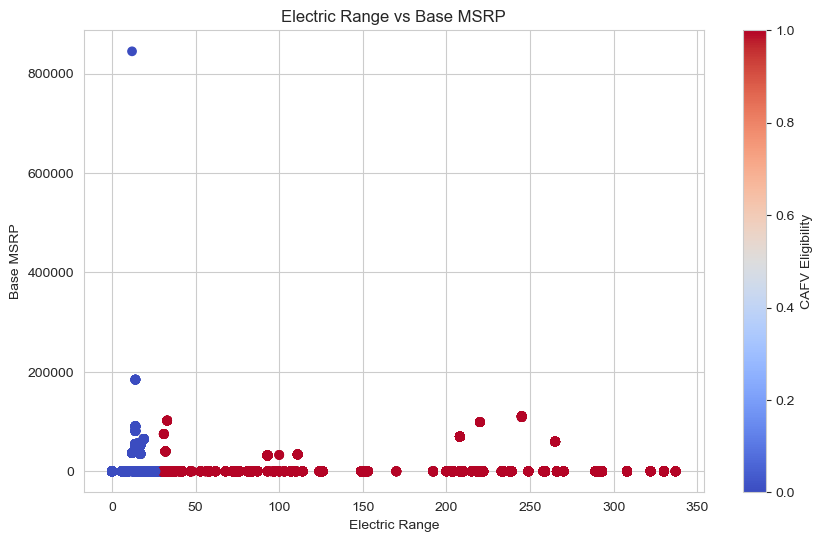

In [19]:
plt.figure(figsize=(10,6))

scatter = plt.scatter(df["Electric Range"], df["Base MSRP"], c=df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"]=="Clean Alternative Fuel Vehicle Eligible", cmap="coolwarm")

plt.xlabel("Electric Range")
plt.ylabel("Base MSRP")
plt.title("Electric Range vs Base MSRP")

cbar = plt.colorbar(scatter)
cbar.set_label("CAFV Eligibility")

plt.show()


- The plot reveals a generally positive relationship between electric range and base MSRP, indicating that electric vehicles with longer ranges tend to be more expensive


- Additionally, the graph shows that a greater proportion of electric vehicles with higher base MSRP are eligible for CAFV incentives, indicated by the larger proportion of blue points towards the top of the plot


- The color bar on the right indicates that blue points are associated with CAFV eligibility, while red points are not eligible

#### Distribution of EVs by their electric range and Clean Alternative Fuel Vehicle (CAFV) Eligibility. 

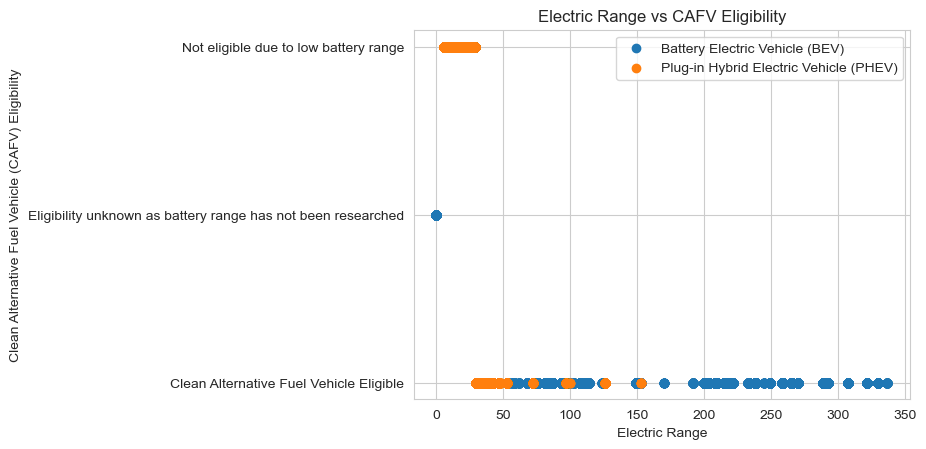

In [20]:
for category, group in df.groupby("Electric Vehicle Type"):
    plt.scatter(group["Electric Range"], group["Clean Alternative Fuel Vehicle (CAFV) Eligibility"], label=category)

plt.xlabel("Electric Range")
plt.ylabel("Clean Alternative Fuel Vehicle (CAFV) Eligibility")
plt.title("Electric Range vs CAFV Eligibility")

plt.legend()

- The plot indicates that there is a wide range of electric ranges available for all Electric Vehicle Types, but the CAFV Eligibility is limited to certain types.

#### Top 10 US Cities with Registered EVs

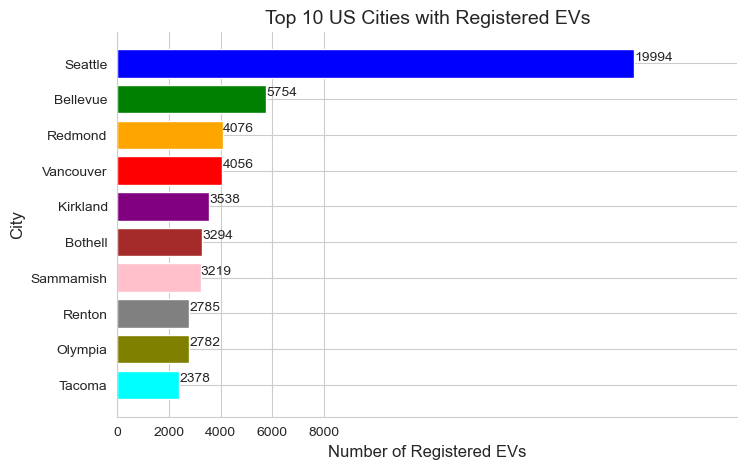

In [21]:
# Get the top 10 cities with the most registered EVs
top_cities = df['City'].value_counts().head(10)

# Define a color palette for the bars
colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']


# Create a horizontal bar plot with customized colors and size
fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(top_cities.index, top_cities.values, color=colors)

# Set the title and axis labels
ax.set_title("Top 10 US Cities with Registered EVs", fontsize=14)
ax.set_xlabel("Number of Registered EVs", fontsize=12)
ax.set_ylabel("City", fontsize=12)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add annotations to the bars
for i, v in enumerate(top_cities.values):
    ax.text(v + 10, i - 0.1, str(v), fontsize=10)

# Adjust the x-axis limits and ticks
ax.set_xlim([0, max(top_cities.values) * 1.2])
ax.set_xticks([0, 2000, 4000, 6000, 8000])

# Invert the y-axis for readability
ax.invert_yaxis()

# Display the plot
plt.show()

#### Frequency of Electric Vehicles (EVs) per Clean Alternative Fuel Vehicle (CAFV) Eligibility

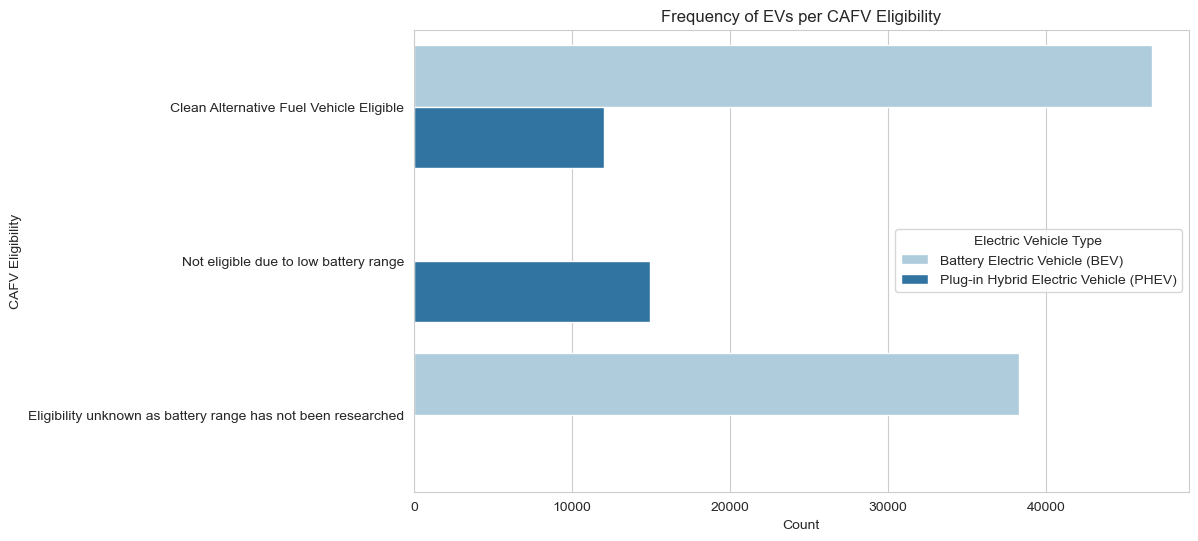

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='Clean Alternative Fuel Vehicle (CAFV) Eligibility', hue='Electric Vehicle Type', palette='Paired')
plt.title('Frequency of EVs per CAFV Eligibility')
plt.xlabel('Count')
plt.ylabel('CAFV Eligibility')
plt.legend(title='Electric Vehicle Type')
plt.show()

#### Percentage of EVs per Manufacturer (Top 20)

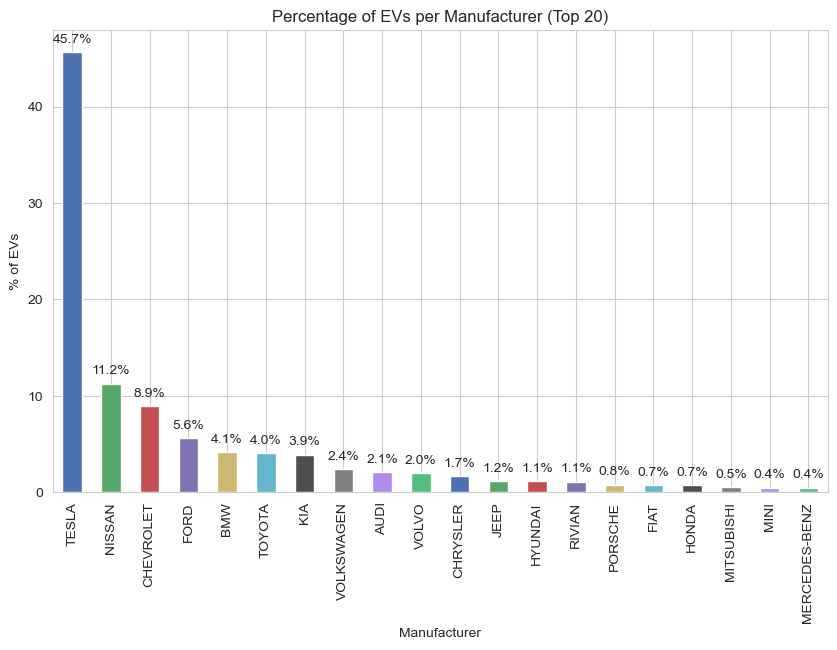

In [23]:
# Calculate the percentage of EVs per manufacturer
ev_per_manufacturer = 100 * df['Make'].value_counts(normalize=True)[:20]

# Define a custom color palette
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD', '#4F4F4F', '#7F7F7F', '#B08BEB', '#52BE80']

# Create a bar plot with custom colors
ax = ev_per_manufacturer.plot(kind='bar', color=colors, figsize=(10,6))

# Set the title and axis labels
ax.set_title('Percentage of EVs per Manufacturer (Top 20)')
ax.set_xlabel('Manufacturer')
ax.set_ylabel('% of EVs')

# Add labels to each bar
for i, v in enumerate(ev_per_manufacturer):
    ax.text(i, v+1, "{:.1f}%".format(v), horizontalalignment='center')

# Show the plot
plt.show()

#### EVs per Battery Type in the US (%)

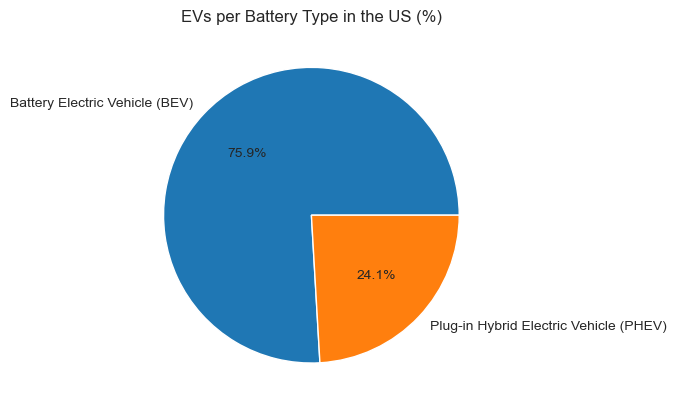

In [24]:
# Calculate the percentage of EVs per Battery Type
battery_type_pct = 100 * df['Electric Vehicle Type'].value_counts() / len(df)

# Get the top 10 Battery Types
top_battery_types = battery_type_pct[:10]

# Create a pie chart
plt.pie(top_battery_types.values, labels=top_battery_types.index, autopct='%1.1f%%')

# Set the title
plt.title("EVs per Battery Type in the US (%)")

# Display the plot
plt.show()

***

# <font color=orange> Data Preprocessing </font>

Before building a predictive model, it is important to preprocess the data to ensure that it is in a suitable format for analysis. Here are the steps we considered:

<font color=blue>  

#### Drop any columns that are not relevant to the analysis or have too many missing values
    
    
#### Drop any rows with missing or invalid values
    
    
#### Convert categorical variables to numerical variables using label encoding
    
    
#### Scale numerical variables to have zero mean and unit variance to improve model performance
    
    
#### Check for and handle any outliers in the data
    
    
#### Split the data into training, and test sets to evaluate model performance
    
 </font>

In [25]:
# importing required libraries
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [26]:
# reading data
df = pd.read_csv("Electric_Vehicle_Population_Data.csv")

#### Drop any columns that are not relevant to the analysis or have too many missing values

In [27]:
# Drop irrelevant columns such as 'VIN (1-10)', 'DOL Vehicle ID', 'Vehicle Location', 'Electric Utility', 
# and '2020 Census Tract' since they are not useful for analysis

df.drop(['VIN (1-10)', 'DOL Vehicle ID', 'Vehicle Location', 'Electric Utility', '2020 Census Tract'], 
        axis=1, inplace=True)

#### Drop any rows with missing or invalid values

In [28]:
# Check for missing values
print(df.isnull().sum())

County                                                 2
City                                                   2
State                                                  0
Postal Code                                            2
Model Year                                             0
Make                                                   0
Model                                                104
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 297
dtype: int64


Expplanation

In [29]:
# drop missing values
df = df.dropna()

In [30]:
print(df.isnull().sum())

County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
dtype: int64


## <font color=orange> Transforming Data</font>


#### Convert categorical variables to numerical variables using label encoding

In [31]:
from sklearn.preprocessing import LabelEncoder

# create a label encoder object
le = LabelEncoder()

# encode categorical features
df['County'] = le.fit_transform(df['County'])
df['City'] = le.fit_transform(df['City'])
df['State'] = le.fit_transform(df['State'])
df['Make'] = le.fit_transform(df['Make'])
df['Model'] = le.fit_transform(df['Model'])
df['Electric Vehicle Type'] = le.fit_transform(df['Electric Vehicle Type'])
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] = le.fit_transform(df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])

#### Scale numerical variables to have zero mean and unit variance to improve model performance

In [32]:
from scipy.stats import skew

# Check for skewness in Electric Range and Base MSRP
er_skew = skew(df['Electric Range'])
msrp_skew = skew(df['Base MSRP'])

print('Electric Range skewness:', er_skew)
print('Base MSRP skewness:', msrp_skew)

Electric Range skewness: 0.9320062041444178
Base MSRP skewness: 10.69972562735919


- The skewness values of Electric Range and Base MSRP indicate that both variables are positively skewed, meaning that their distribution has a long right tail. In this case, a positive skewness of **0.93** for Electric Range suggests that the majority of the observations have a lower value, while a few extreme values have higher values. Similarly, a skewness of **6.4** for Base MSRP suggests a highly skewed distribution with a few high-priced vehicles significantly influencing the mean value


- In general, it is desirable to have a symmetric distribution with a skewness value of 0. However, in some cases, such as with price data, it is common to have a positively skewed distribution

#### Electric range can be transformed into a categorical variable by defining range intervals and assigning a category to each interval

In [33]:
import pandas as pd

# define the bin edges for each category
bins = [-1, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]

# define the labels for each category
labels = ['<=50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-500', '501-550', '551-600', '601-650', '651-700', '701-750', '751-800', '801-850', '851-900', '901-950', '951-1000']

# create a new column with the categorical variable
df['Electric Range Category'] = pd.cut(df['Electric Range'], bins=bins, labels=labels)

In [34]:
df.columns

Index(['County', 'City', 'State', 'Postal Code', 'Model Year', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'Electric Range Category'],
      dtype='object')

## <font color=orange> Outlier Detection and Removing the Outliers [Scaling the Data]</font>


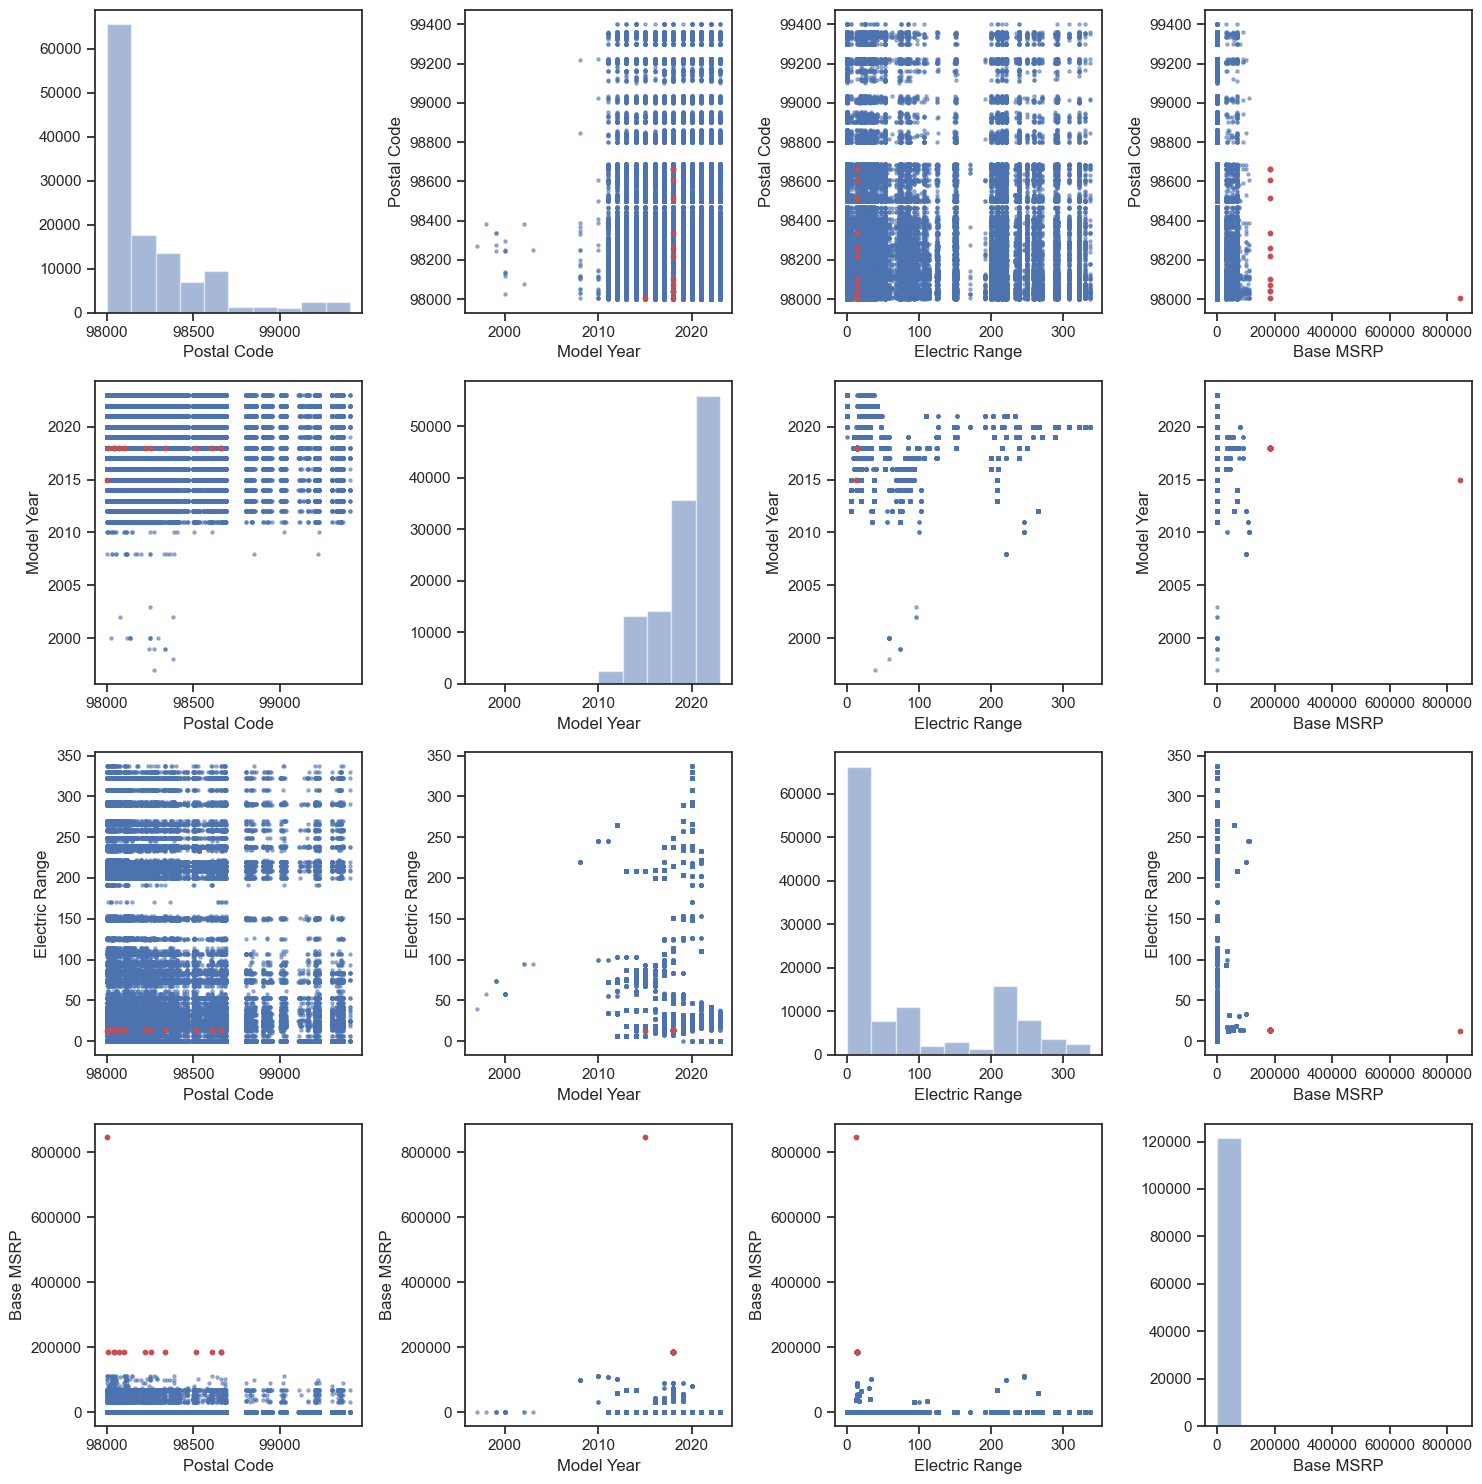

In [35]:
# plot outliers

from scipy.stats import chi2
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to calculate the Mahalanobis distance
def mahalanobis_distance(x):
    x_mean = np.mean(x)
    x_cov = np.cov(x, rowvar=False)
    x_icov = np.linalg.inv(x_cov)
    d = np.sqrt(np.dot(np.dot((x - x_mean), x_icov), (x - x_mean).T))
    return d

# Select the columns to be used for the calculation
columns = ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP']

# Calculate the Mahalanobis distance for each data point
X = df[columns]
X_mean = np.mean(X)
X_cov = np.cov(X, rowvar=False)
X_icov = np.linalg.inv(X_cov)

df['Mahalanobis'] = np.sqrt(np.sum(np.dot((X - X_mean), X_icov) * (X - X_mean), axis=1))

# Calculate the threshold for outliers using the chi-squared distribution
n_dim = len(columns)
alpha = 0.01
threshold = chi2.ppf(1 - alpha, n_dim)

# Identify the outliers
outliers = df[df['Mahalanobis'] > threshold]

# Plot the data points and outliers for all combinations of variables
sns.set(style='ticks')
fig, axes = plt.subplots(nrows=len(columns), ncols=len(columns), figsize=(15, 15))
for i in range(len(columns)):
    for j in range(len(columns)):
        ax = axes[i, j]
        if i == j:
            ax.hist(df[columns[i]], bins=10, alpha=0.5)
            ax.set_xlabel(columns[i])
        else:
            ax.scatter(df[columns[j]], df[columns[i]], s=5, alpha=0.5)
            ax.scatter(outliers[columns[j]], outliers[columns[i]], s=10, c='r')
            ax.set_xlabel(columns[j])
            ax.set_ylabel(columns[i])
plt.tight_layout()
plt.show()

- The red dots present in the graphs represent **outliers**

In [36]:
# remove outliers

# Filter the dataframe to exclude the outliers
df = df[df['Mahalanobis'] <= threshold]

# Drop the 'mahalanobis' column
df.drop(columns='Mahalanobis', inplace=True)

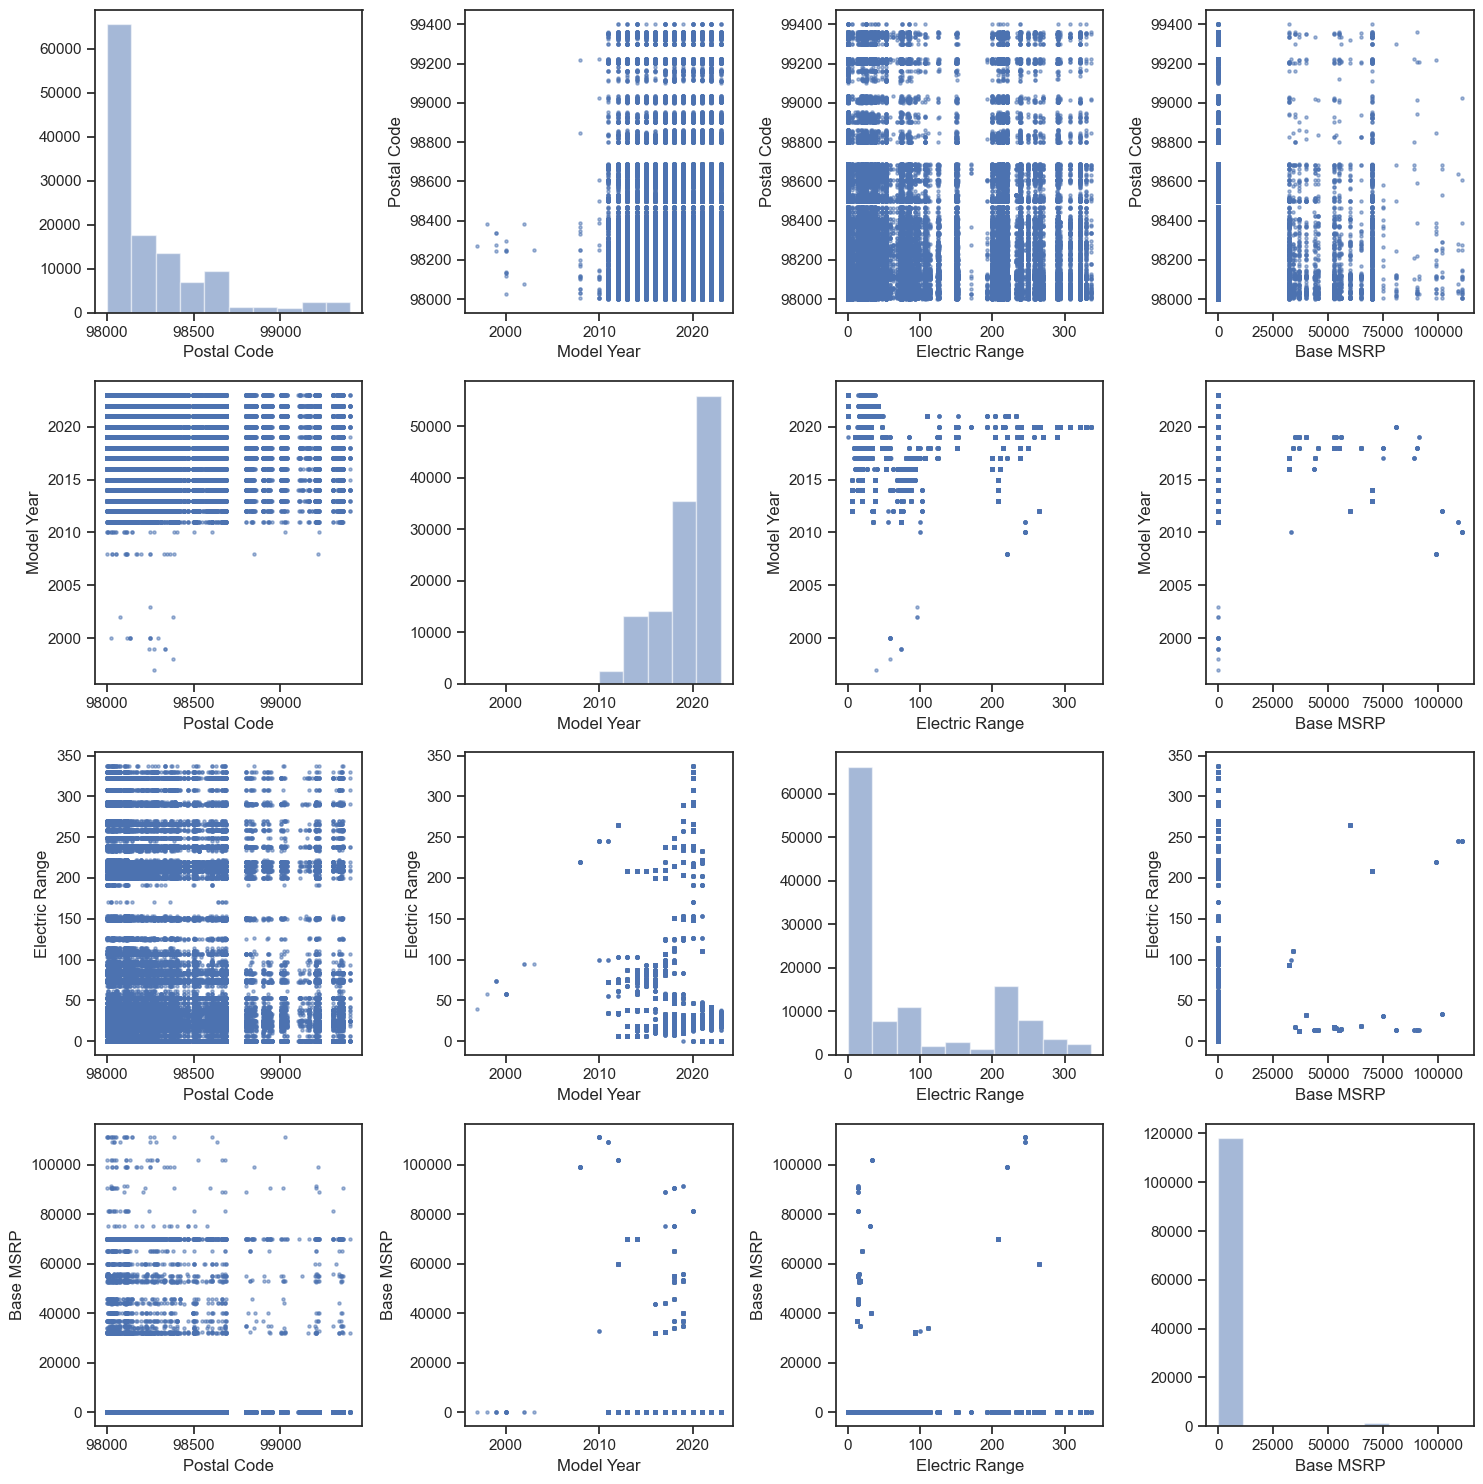

In [37]:
# check for outliers

from scipy.stats import chi2
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to calculate the Mahalanobis distance
def mahalanobis_distance(x):
    x_mean = np.mean(x)
    x_cov = np.cov(x, rowvar=False)
    x_icov = np.linalg.inv(x_cov)
    d = np.sqrt(np.dot(np.dot((x - x_mean), x_icov), (x - x_mean).T))
    return d

# Select the columns to be used for the calculation
columns = ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP']

# Calculate the Mahalanobis distance for each data point
X = df[columns]
X_mean = np.mean(X)
X_cov = np.cov(X, rowvar=False)
X_icov = np.linalg.inv(X_cov)

df['Mahalanobis'] = np.sqrt(np.sum(np.dot((X - X_mean), X_icov) * (X - X_mean), axis=1))

# Calculate the threshold for outliers using the chi-squared distribution
n_dim = len(columns)
alpha = 0.01
threshold = chi2.ppf(1 - alpha, n_dim)

# Identify the outliers
outliers = df[df['Mahalanobis'] > threshold]

# Plot the data points and outliers for all combinations of variables
sns.set(style='ticks')
fig, axes = plt.subplots(nrows=len(columns), ncols=len(columns), figsize=(15, 15))
for i in range(len(columns)):
    for j in range(len(columns)):
        ax = axes[i, j]
        if i == j:
            ax.hist(df[columns[i]], bins=10, alpha=0.5)
            ax.set_xlabel(columns[i])
        else:
            ax.scatter(df[columns[j]], df[columns[i]], s=5, alpha=0.5)
            ax.scatter(outliers[columns[j]], outliers[columns[i]], s=10, c='r')
            ax.set_xlabel(columns[j])
            ax.set_ylabel(columns[i])
plt.tight_layout()
plt.show()

- As we can see, all the outlier present in all the graphs, are now removed.

In [38]:
num_zeros = (df['Base MSRP'] == 0).sum()
print(f"Number of 0 values in Base MSRP: {num_zeros}")

Number of 0 values in Base MSRP: 118116


- As almost 90% of the data in Base MSRP is 0, it may be a good idea to consider dropping the feature entirely from the analysis, as it is unlikely to provide much useful information

In [39]:
df.drop(['Base MSRP'], axis=1, inplace=True)

## <font color=orange> Statistical Test [Feature Engineering] </font>


<font color=blue>  
    
**Using the Random Forest feature importance method to rank the importance of all features in predicting the target variable "Electric Range"**
    
</font>

In [40]:
df.drop(columns='Mahalanobis', inplace=True)

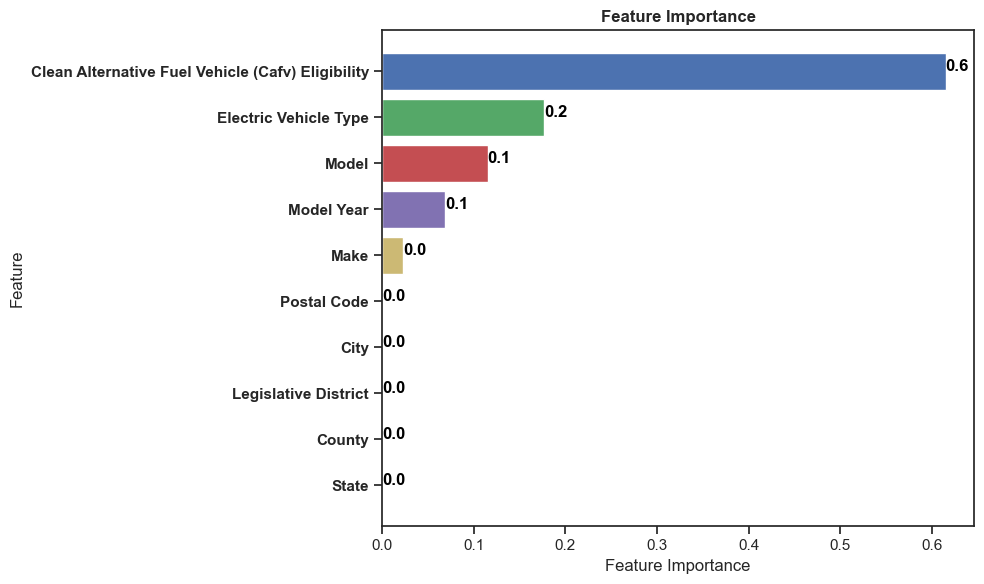

In [41]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Define the input and output variables
X = df.drop(['Electric Range', 'Electric Range Category'], axis=1)
y = df['Electric Range']

n_top = 10

# Train a Random Forest model to estimate feature importances
rf = RandomForestRegressor()
rf.fit(X, y)

# Extract the feature importances and sort them in descending order
importances = rf.feature_importances_
sorted_idx = np.argsort(importances)[::-1]

# Get the top feature names and importances
feat_names = [X.columns[idx] for idx in sorted_idx[:n_top]]
feat_importances = importances[sorted_idx][:n_top]

# Plot the feature importances as horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#4c72b0', '#55a868', '#c44e52', '#8172b2', '#ccb974', '#64b5cd', '#4c4c4c', '#8c8c8c', '#bcbd22', '#e377c2', '#f7b6d2']
ax.barh(range(n_top), feat_importances, align='center', color=colors)
ax.set_yticks(range(n_top))
ax.set_yticklabels([f'{name.title()}' for name in feat_names], fontweight='bold')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Feature Importance')
ax.set_ylabel('Feature')
ax.set_title('Feature Importance', fontweight='bold')

# Add feature importances as labels on the bars
for i, v in enumerate(feat_importances):
    ax.text(v - 0.0001, i, str(round(v, 1)), color='black', fontweight='bold')

plt.tight_layout()
# plt.savefig('feat_imp.png', dpi=300)
plt.show()

- These scores are feature importances or relative importance values for each of the features in the dataset in predicting the target variable "Electric Range"


- The higher the value of the feature importance score, the more important the feature is in predicting the target variable. For example, in this case, "Clean Alternative Fuel Vehicle (CAFV) Eligibility" has the highest importance score of 0.615, which indicates that it is the most important feature in predicting "Electric Range". Similarly, "Electric Vehicle Type" and "Model" have relatively high importance scores of 0.177 and 0.115, respectively, which suggest that they are also important features in predicting the target variable


- On the other hand, "County", "State", "City" and other features have importance scores close to zero, indicating that they have very little predictive power for the target variable. Therefore, they can be considered less important or even irrelevant features in the model

## <font color=orange> Splitting the data </font>


In [42]:
from sklearn.model_selection import train_test_split

# Split the data into X (features) and y (target variable)
X = df.drop(['Electric Range', 'Electric Range Category', 'City', 'State', 'County', 
             'Postal Code', 'Legislative District'], axis=1)

y = df['Electric Range Category']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

# Print the shape of the training and test sets
print('Training set shape:', X_train.shape, y_train.shape)
print('Test set shape:', X_test.shape, y_test.shape)

Training set shape: (97251, 5) (97251,)
Test set shape: (24313, 5) (24313,)


***

## <font color=orange> Classifier </font>

<font color=blue>  
    
**Predicting the "Electric Range Category" of an electric vehicle based on its attributes**
    
</font>

#### **Logistic Regression**

In [43]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, cross_val_predict


# create X and y variables for features and target
X = df.drop(['Electric Range', 'Electric Range Category', 'City', 'State', 'County', 
             'Postal Code', 'Legislative District'], axis=1)

y = df['Electric Range Category']


# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

# create logistic regression model
lr = LogisticRegression(random_state=99)

# define hyperparameters to tune
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

kfold= KFold(n_splits=5, shuffle=True, random_state=99)

# create GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=kfold)

# fit the model on training data using grid search
grid_search.fit(X_train, y_train)

# print best parameters
lr_best_param=grid_search.best_params_
print("Best parameters: ",lr_best_param )
lr_cross_score=round(grid_search.best_score_, 4)*100
print("\nBest cross-validation score: ", lr_cross_score)

# predict the test data using the best model
y_pred = grid_search.best_estimator_.predict(X_test)

y_prob = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

# The accuracy score on the model.
test_score = accuracy_score(y_test, y_pred)
lr_acc_score=round(test_score, 4)*100
print("\nModel Accuracy Score: ",lr_acc_score)

# The confusion matrix of the model
lr_cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix: \n",lr_cm)

# Recall
lr_recall=round(recall_score(y_test,y_pred,average="weighted"),4)*100
print("\nRecall score: ",lr_recall)

#Precision
lr_precision=round(precision_score(y_test,y_pred,average="macro"),4)*100
print("Precision score: ",lr_precision)

#f_1
lr_f1=round(f1_score(y_test,y_pred,average="macro"),4)*100
print("f1 score: ",lr_f1)

# clasification report
lr_report= classification_report(y_test, y_pred)
print("\nClassification report: \n", lr_report)

Best parameters:  {'C': 0.1, 'penalty': 'l2'}

Best cross-validation score:  57.82000000000001

Model Accuracy Score:  57.85

Confusion Matrix: 
 [[    0     0   117     0     0     0   648]
 [    0     0     0     0     0     0   566]
 [    0     0     0     0     0     0  4201]
 [    0     0     0     0     0     0  1279]
 [    0     0     0     0     0     0   513]
 [    0     0   110     0     0     0  2630]
 [    0     0   184     0     0     0 14065]]

Recall score:  57.85
Precision score:  8.41
f1 score:  10.530000000000001

Classification report: 
               precision    recall  f1-score   support

     101-150       0.00      0.00      0.00       765
     151-200       0.00      0.00      0.00       566
     201-250       0.00      0.00      0.00      4201
     251-300       0.00      0.00      0.00      1279
     301-350       0.00      0.00      0.00       513
      51-100       0.00      0.00      0.00      2740
        <=50       0.59      0.99      0.74     14249

   

#### **Decision Tree Classifier**

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report


# create X and y variables for features and target
X = df.drop(['Electric Range', 'Electric Range Category', 'City', 'State', 'County', 
             'Postal Code', 'Legislative District'], axis=1)

y = df['Electric Range Category']

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

# create a decision tree classifier model
dt = DecisionTreeClassifier(random_state=99)

# fit the model on training data
dt.fit(X_train, y_train)

# predict the test data
y_pred = dt.predict(X_test)

kfold= KFold(n_splits=5, shuffle=True, random_state=99)

# grid search for hyperparameters
param_grid = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(dt, param_grid, cv=kfold)
grid_search.fit(X_train, y_train)


dt_best_param=grid_search.best_params_
print("Best parameters: ", dt_best_param)
dt_cross_score=  round(grid_search.best_score_, 4)*100
print("\nBest cross-validation score: ",dt_cross_score)

# The accuracy score on the model.
test_score = accuracy_score(y_test, y_pred)
dt_acc_score=round(test_score, 4)*100
print("\nModel Accuracy Score: ",dt_acc_score )

# The confusion matrix of the model
dt_cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix: \n",dt_cm)

# Recall
dt_recall= round(recall_score(y_test,y_pred,average="weighted"),4)*100
print("\nRecall score: ",dt_recall)

#Precision
dt_precision=round(precision_score(y_test,y_pred,average="macro"),4)*100
print("Precision score: ",dt_precision)

#f_1
dt_f1= round(f1_score(y_test,y_pred,average="macro"),4)*100
print("f1 score: ",dt_f1)

# clasification report
dt_report= classification_report(y_test, y_pred)
print("\nClassification report: \n",dt_report)

Best parameters:  {'max_depth': 10, 'min_samples_split': 2}

Best cross-validation score:  98.56

Model Accuracy Score:  98.52

Confusion Matrix: 
 [[  763     2     0     0     0     0     0]
 [    0   550    16     0     0     0     0]
 [   45     0  4156     0     0     0     0]
 [    0     0     0   983   296     0     0]
 [    0     0     0     0   513     0     0]
 [    0     0     0     0     0  2740     0]
 [    0     0     0     0     0     0 14249]]

Recall score:  98.52
Precision score:  93.87
f1 score:  94.17

Classification report: 
               precision    recall  f1-score   support

     101-150       0.94      1.00      0.97       765
     151-200       1.00      0.97      0.98       566
     201-250       1.00      0.99      0.99      4201
     251-300       1.00      0.77      0.87      1279
     301-350       0.63      1.00      0.78       513
      51-100       1.00      1.00      1.00      2740
        <=50       1.00      1.00      1.00     14249

    accuracy 

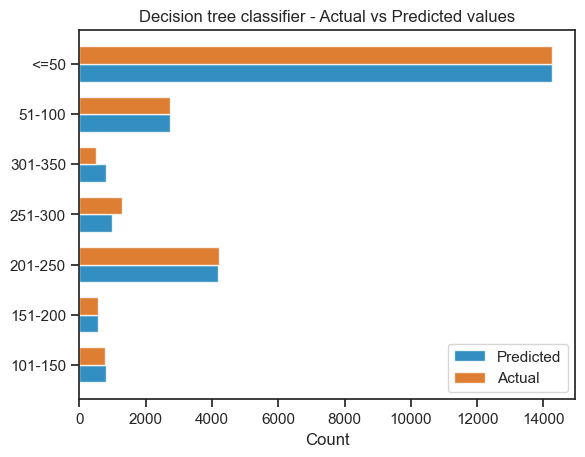

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Count the occurrences of each predicted and actual value
unique, counts_pred = np.unique(y_pred, return_counts=True)
unique, counts_actual = np.unique(y_test, return_counts=True)

# Create a bar plot of the predicted vs actual values
fig, ax = plt.subplots()
index = np.arange(len(unique))
bar_width = 0.35
opacity = 0.8
colors = ['#4c72b0', '#55a868', '#c44e52', '#8172b2', '#ccb974', '#64b5cd', '#4c4c4c']

rects1 = ax.barh(index, counts_pred, bar_width,
                 alpha=opacity,
                 color='#0072B2',
                 label='Predicted')

rects2 = ax.barh(index + bar_width, counts_actual, bar_width,
                 alpha=opacity,
                 color='#D55E00',
                 label='Actual')

plt.title("Decision tree classifier - Actual vs Predicted values")
ax.set_xlabel('Count')
ax.set_yticks(index + bar_width / 2)
ax.set_yticklabels(unique)
ax.legend()
# plt.savefig('dt_clf.png')
plt.show()

In [46]:
# Create the data for the table
data = {'Classifiers': ['Logistic Regression','Decision Tree' ],
        'Accuracy_Scores': [lr_acc_score,dt_acc_score],
       'Precision_scores': [lr_precision, dt_precision],
       'Recall Scores':[lr_recall, dt_recall],
       'f1 Scores':[lr_f1, dt_f1],
       'Optimal Parameters':[lr_best_param,dt_best_param],
        'Cross Validation Scores':[lr_cross_score, dt_cross_score]
       }

# Create the table (DataFrame)
reg_df = pd.DataFrame(data)

# Display the table
reg_df

,Classifiers,Accuracy_Scores,Precision_scores,Recall Scores,f1 Scores,Optimal Parameters,Cross Validation Scores
0,Logistic Regression,57.85,8.41,57.85,10.53,"{'C': 0.1, 'penalty': 'l2'}",57.82
1,Decision Tree,98.52,93.87,98.52,94.17,"{'max_depth': 10, 'min_samples_split': 2}",98.56


- The Decision Tree classifier outperforms the Logistic Regression classifier in terms of all metrics


- The Decision Tree classifier achieves a significantly higher accuracy score of 98.52% compared to the Logistic Regression classifier's accuracy score of 58.86%


- The cross-validation scores suggest that the Decision Tree classifier is likely to generalize better to new data than the Logistic Regression classifier

## <font color=orange> Regressor </font>




<font color=blue>  
    
#### Using the features in the dataset to predict the electric range of the vehicle
    
</font>

#### **Linear Regressor**

In [47]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, cross_val_predict

X = df.drop(['Electric Range', 'Electric Range Category', 'City', 'State', 'County', 
             'Postal Code', 'Legislative District'], axis=1)

y = df['Electric Range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=99)

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

kfold = KFold(n_splits=5, random_state=99, shuffle=True) # k=5, split the data into 5 equal parts
cv_result2 = cross_val_score(model, X_train, y_train, cv = kfold, scoring = "neg_mean_squared_error")
y_fit1 = cross_val_predict(model,X_train,y_train,cv=5) 

lr_mse=round(np.mean(cv_result2),4)*(-1)
print("Cross-validation MSE: ", lr_mse)

lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', lr_rmse)

lr_r2 = metrics.r2_score(y_test, y_pred)
print('R-squared:', lr_r2)

# define the grid search parameters
param_grid = {'fit_intercept': [True, False]}

# create the grid search
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# fit the grid search to the data
grid_search.fit(X_train, y_train)

# print the best parameters and score
lr_best_param=grid_search.best_params_
print("Best parameters: ",lr_best_param )

Cross-validation MSE:  4906.8154
Root Mean Squared Error: 70.15115046994238
R-squared: 0.5169088305617446
Best parameters:  {'fit_intercept': True}


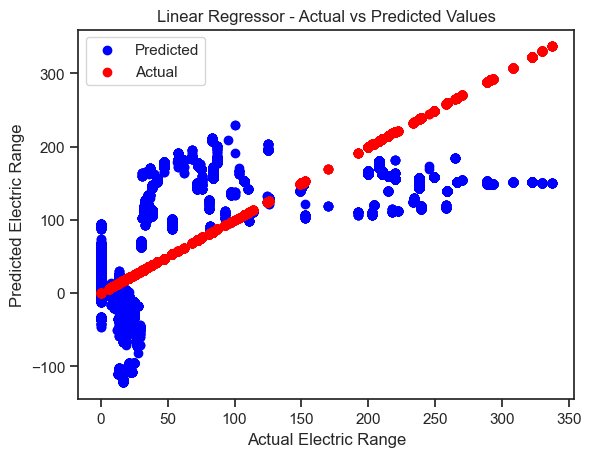

In [48]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')
plt.xlabel('Actual Electric Range')
plt.ylabel('Predicted Electric Range')
plt.title('Linear Regressor - Actual vs Predicted Values')
plt.legend()
# plt.savefig('li_reg.png')
plt.show()

#### **Random Forest Regressor**

In [49]:
# Since the data contains almost 121978 rows, running Grid Search CV takes a considerable amount of time. 
# After running the block, please wait for about 5 - 7 minutes for the output to be visible. 

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

X = df.drop(['Electric Range', 'Electric Range Category', 'City', 'State', 'County', 
             'Postal Code', 'Legislative District'], axis=1)

y = df['Electric Range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=99)

rf_regressor = RandomForestRegressor(random_state=99)

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2']
}

# Define the grid search object
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
rf_best_param = grid_search.best_params_


# Make predictions using the best model found by the grid search
y_pred = grid_search.predict(X_test)

# Evaluate the performance of the best model using mean squared error and R-squared
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = metrics.r2_score(y_test, y_pred)

print('Cross-validation MSE:', rf_mse)
print('Root Mean Squared Error:', rf_rmse)
print('R-squared:', rf_r2)
print('Best hyperparameters:', rf_best_param)

Cross-validation MSE: 26.101582488830232
Root Mean Squared Error: 5.108970785670068
R-squared: 0.9974377214439571
Best hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


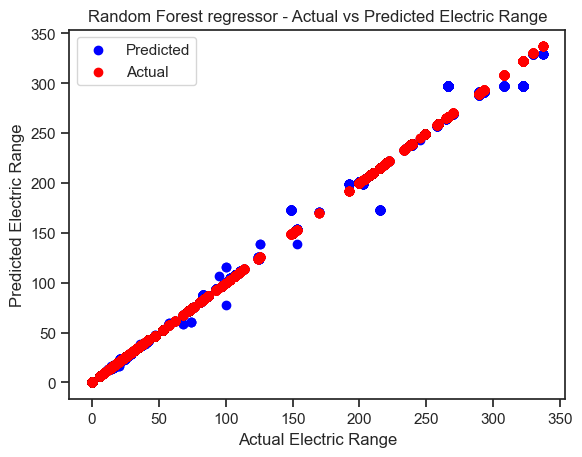

In [50]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual')
plt.xlabel('Actual Electric Range')
plt.ylabel('Predicted Electric Range')
plt.title('Random Forest regressor - Actual vs Predicted Electric Range')
plt.legend()
# plt.savefig('rf_reg.png')
plt.show()

In [51]:
import pandas as pd

# Create the data for the table
data = {'Regressors': ['Linear Regressor','Random Forest Regressor'],
        'Cross-validation MSE':[lr_mse, rf_mse],
        'Root Mean Squared Error':[lr_rmse,rf_rmse],
        'R-squared':[lr_r2,rf_r2],
       }

# Create the table (DataFrame)
cls_df = pd.DataFrame(data)

# Display the table
cls_df

,Regressors,Cross-validation MSE,Root Mean Squared Error,R-squared
0,Linear Regressor,4906.815400,70.151150,0.516909
1,Random Forest Regressor,26.101582,5.108971,0.997438


- The Random Forest Regressor outperforms the Linear Regressor in terms of all metrics


- The Random Forest Regressor achieves a much lower cross-validation MSE of 26.051983 compared to the Linear Regressor's cross-validation MSE of 4888.003900


- The R-squared score for the Random Forest Regressor is very close to 1, indicating that the independent variables explain almost all of the variance in the dependent variable


- On the other hand, the R-squared score for the Linear Regressor is much lower, suggesting that the independent variables do not explain as much of the variance in the dependent variable

***

## <font color=orange> Clustering </font>

<font color=blue>  
    
#### Clustering the data points based on their electric range into 3 clusters
    
</font>

#### **KMeans clustering**

If the clustering code block is not running, there can be either of the two fixes for the same

- Downgrade numpy to 1.21.4
- Upgrade threadpoolctl to 3.1.0

After installation, please restart the kernel and run all the cells again

In [52]:
# !pip install numpy==1.21.4
# !pip install threadpoolctl==3.1.0

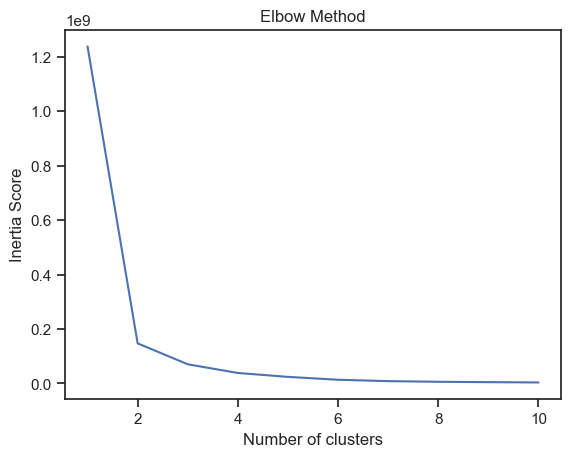

In [53]:
from sklearn.cluster import KMeans

# Subset data based on relevant features
X = df[["Electric Range"]].values

# Find the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.show()

# Print the optimal number of clusters
diff = np.diff(wcss)
diff_r = diff[1:] / diff[:-1]
k_opt = 1 + diff_r.argmin()

# Apply clustering algorithm with the chosen number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

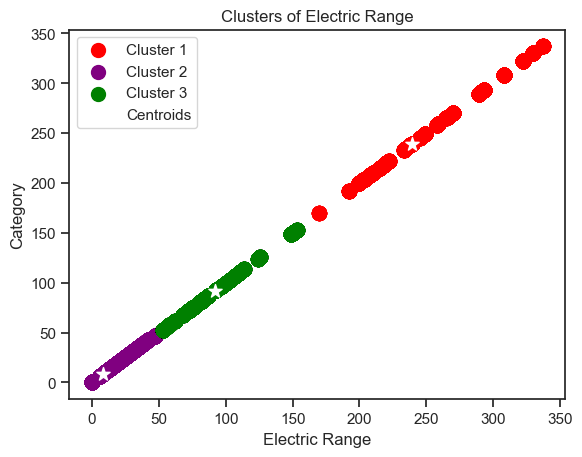

In [54]:
# Visualize the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 0], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 0], s = 100, c = 'purple', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 0], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 0], marker='*', s = 100, c = 'white', label = 'Centroids')
plt.title('Clusters of Electric Range')
plt.xlabel('Electric Range')
plt.ylabel('Category')
plt.legend()
plt.show()

- The Electric Range is a continous variable which was transformed into a -categorical variable. The transformation is done by categorizing the Electric Range values with definite range intervals


As seen in the above plot, the Kmeans optimal number of clusters is 3 and created 3 different clusters for this dataset. 

- Short range (up to 100 miles) [Cluster 2]

- Mid range (between 100 and 200 miles) [Cluster 3]

- Long range (over 200 miles) [Cluster 1]

The three clusters formed show the distribution of the Electric Range in the datset from low to high. The centroids are also calculated for each cluster and plotted in the graph.

***

## <font color=orange> Advance Method </font>

<font color=blue>  
    
#### Using Gradient Boosting Regressor to enhance the features and improve the accuracy of our predictions for the electric range of a vehicle
    
</font>

#### Ensemble: Gradient Boosting Regressor + Random Forest Regressor

In [55]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error

X = df.drop(['Electric Range'], axis=1)
y = df['Electric Range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=99)

# Define the column transformer for the categorical variables
cat_transformer = OneHotEncoder(handle_unknown='ignore')

# Define the column transformer for the numerical variables
num_transformer = StandardScaler()

# Combine the column transformers
preprocessor = ColumnTransformer(transformers=[('num', num_transformer, ['Postal Code', 'Model Year']), ('cat', cat_transformer, ['County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range Category'])])

# Fit and transform the training data using the preprocessor
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Define the models to be ensembled
rf = RandomForestRegressor(n_estimators=100, random_state=42)
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit the models on the preprocessed training data
rf.fit(X_train_preprocessed, y_train)
gb.fit(X_train_preprocessed, y_train)

# Transform the testing data using the preprocessor
X_test_preprocessed = preprocessor.transform(X_test)

# Predict the electric range on the test data using the ensembled models
y_pred_rf = rf.predict(X_test_preprocessed)
y_pred_gb = gb.predict(X_test_preprocessed)
y_pred_ensemble = (y_pred_rf + y_pred_gb) / 2

# Evaluate the performance of the ensemble model
gb_mse = mean_squared_error(y_test, y_pred_ensemble)
print('Mean squared error: ', gb_mse)

Mean squared error:  5.066162062305393


In [56]:
import pandas as pd

# Create the data for the table
data = {'MSE': [rf_mse, gb_mse]}

# Create the table (DataFrame)
cls_df = pd.DataFrame(data)

cls_df = cls_df.rename(index={0: 'Random Forest Regressor', 1: 'Random Forest + Gradient Boosting'})
# Display the table
cls_df

,MSE
Random Forest Regressor,26.101582
Random Forest + Gradient Boosting,5.066162


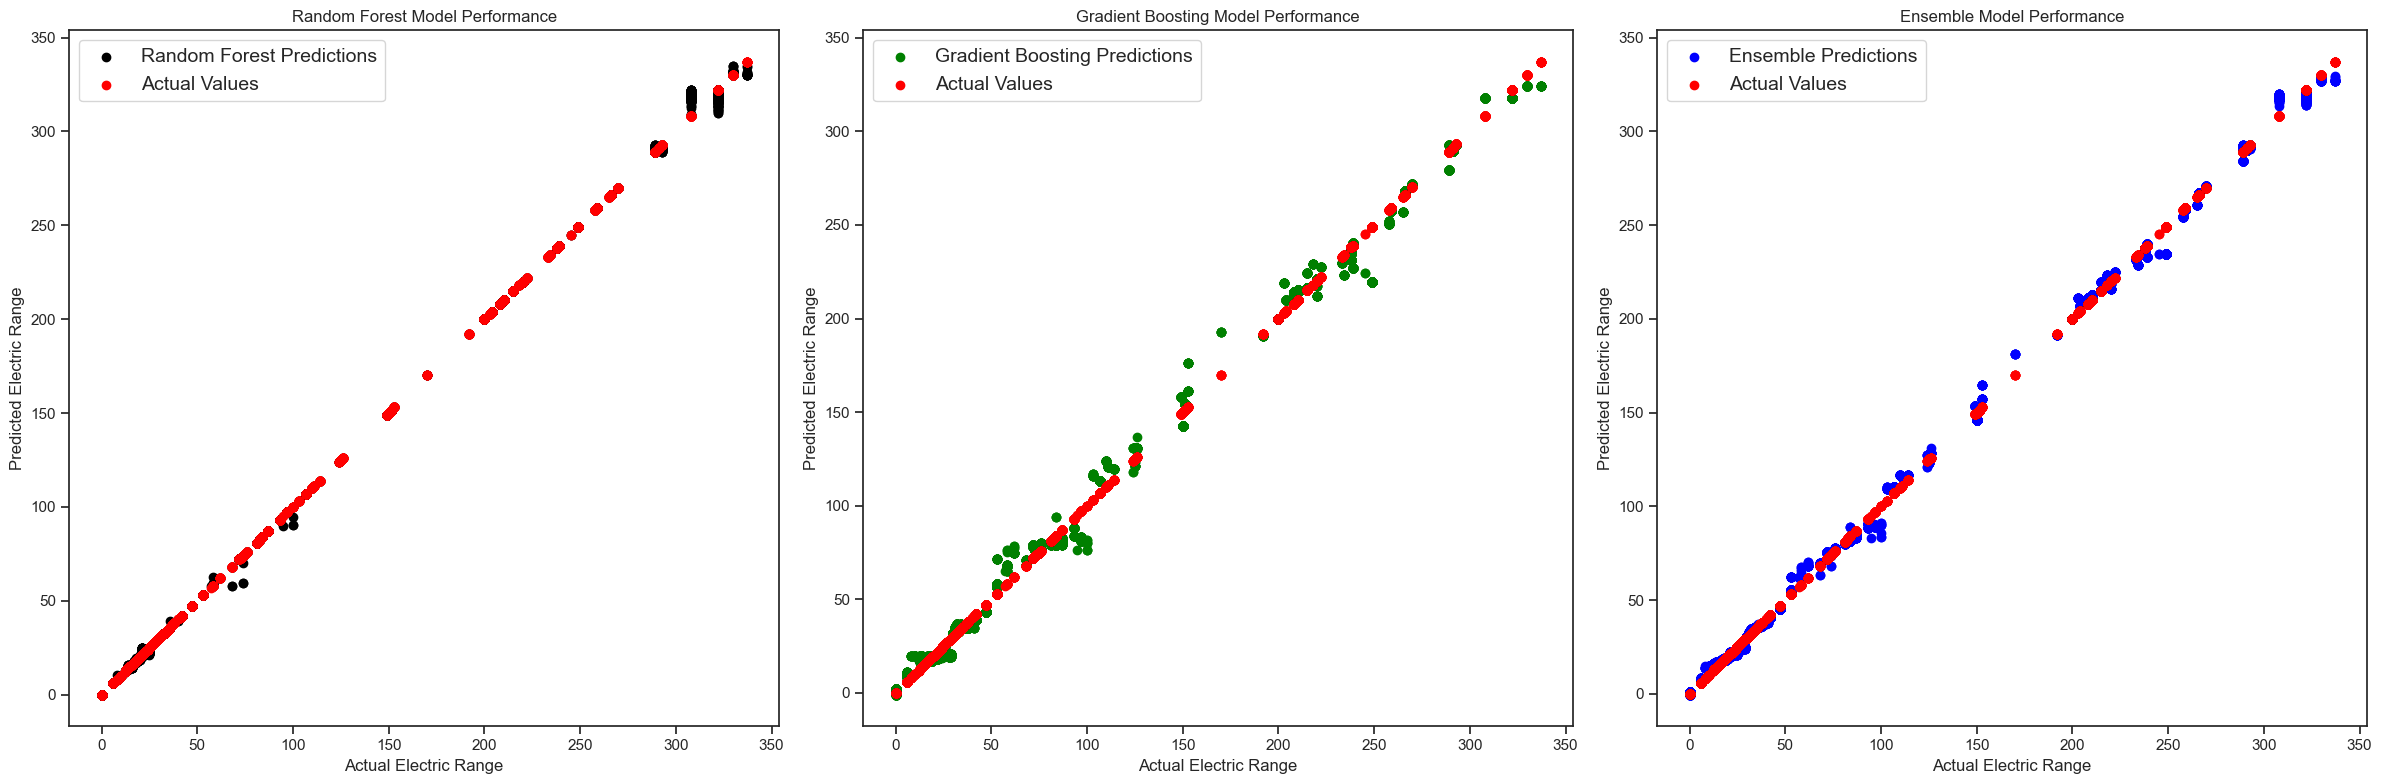

In [57]:
fig, axs = plt.subplots(1, 3, figsize=(24, 8))
axs[0].scatter(y_test, y_pred_rf, color='black', label='Random Forest Predictions')
axs[0].scatter(y_test, y_test, color='red', label='Actual Values')
axs[0].set_xlabel('Actual Electric Range')
axs[0].set_ylabel('Predicted Electric Range')
axs[0].set_title('Random Forest Model Performance')
axs[0].legend(fontsize=14)

axs[1].scatter(y_test, y_pred_gb, color='green', label='Gradient Boosting Predictions')
axs[1].scatter(y_test, y_test, color='red', label='Actual Values')
axs[1].set_xlabel('Actual Electric Range')
axs[1].set_ylabel('Predicted Electric Range')
axs[1].set_title('Gradient Boosting Model Performance')
axs[1].legend(fontsize=14)

axs[2].scatter(y_test, y_pred_ensemble, color='blue', label='Ensemble Predictions')
axs[2].scatter(y_test, y_test, color='red', label='Actual Values')
axs[2].set_xlabel('Actual Electric Range')
axs[2].set_ylabel('Predicted Electric Range')
axs[2].set_title('Ensemble Model Performance')
axs[2].legend(fontsize=14)

plt.tight_layout()
# plt.savefig('advance1.png', dpi=300)
plt.show()

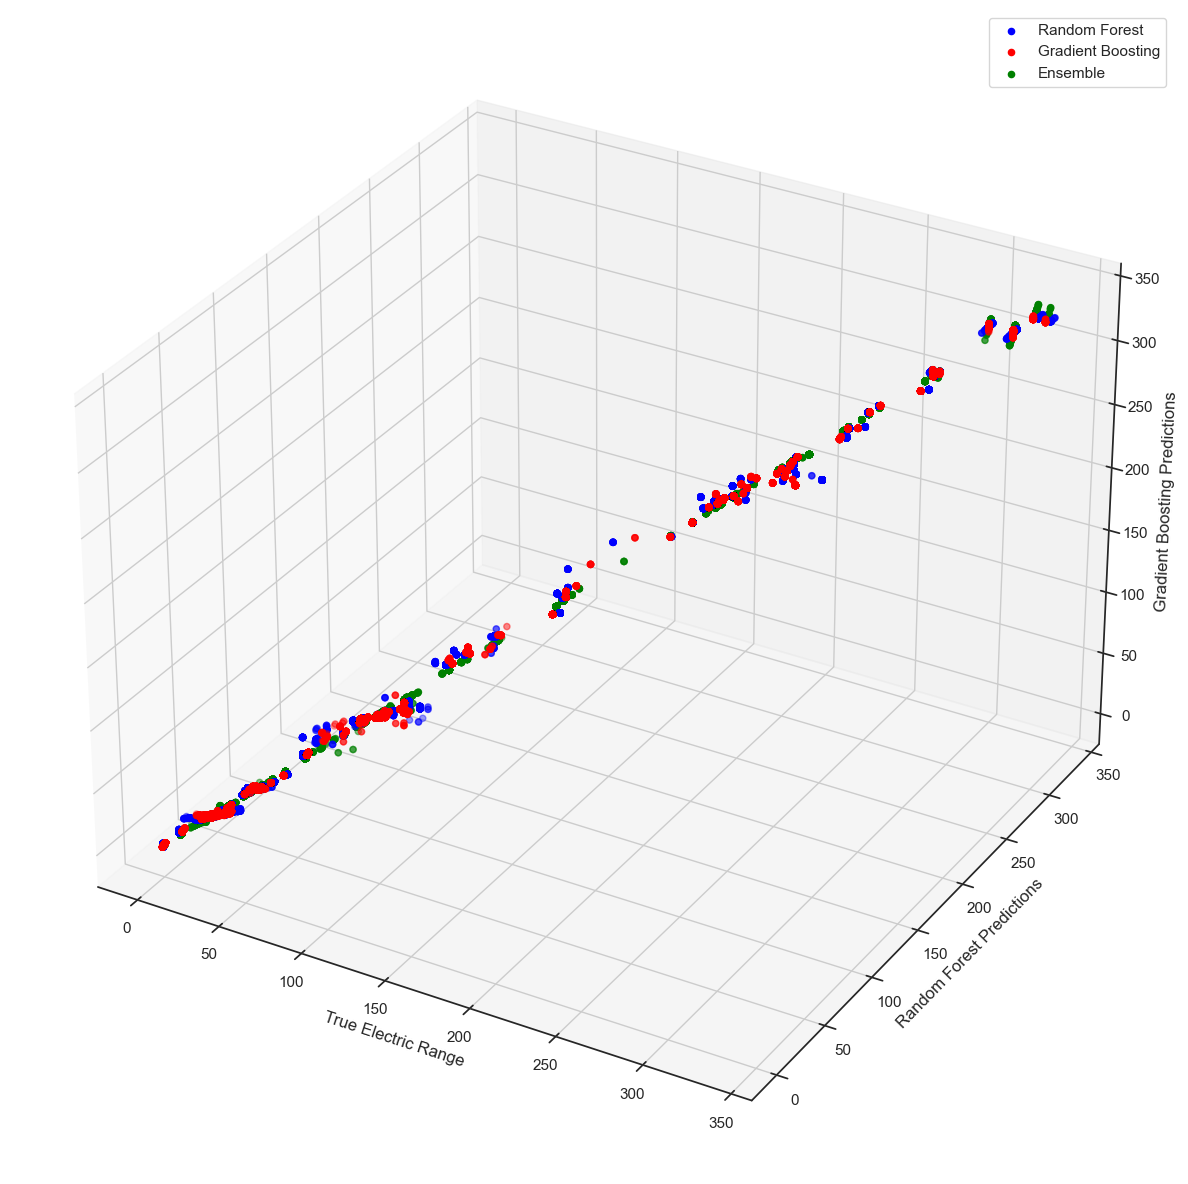

In [58]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(y_test, y_pred_rf, y_pred_gb, color='blue', label='Random Forest')
ax.scatter(y_test, y_pred_gb, y_pred_ensemble, color='red', label='Gradient Boosting')
ax.scatter(y_test, y_pred_ensemble, y_pred_rf, color='green', label='Ensemble')
ax.set_xlabel('True Electric Range')
ax.set_ylabel('Random Forest Predictions')
ax.set_zlabel('Gradient Boosting Predictions')
ax.legend()
plt.tight_layout()
# plt.savefig('advance2.png')
plt.show()

- Based on the mean squared error (MSE) values, it appears that the ensemble model, which combines the Random Forest and Gradient Boosting models, outperforms the Random Forest model alone. 


- The MSE for the Random Forest model is 26.10, while the MSE for the ensemble model is much lower at 5.07. 


- This suggests that the ensemble model is better at predicting the electric range of vehicles than the Random Forest model alone.

***